In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf

In [2]:
nsample = 60
ar_coefs = [np.array([1, -0.9]), np.array([1, 0]), np.array([1, 0.9])]
ma_coef = np.array([1])
linear_coef = 0.1

In [3]:
AR_objects = [ArmaProcess(ar=ar_coef, ma=ma_coef) for ar_coef in ar_coefs]
ar_data = [AR_object.generate_sample(nsample=nsample) for AR_object in AR_objects]

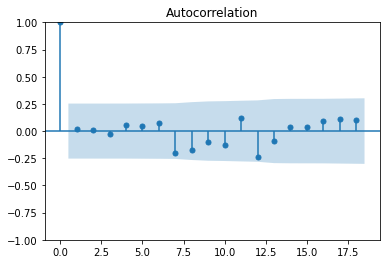

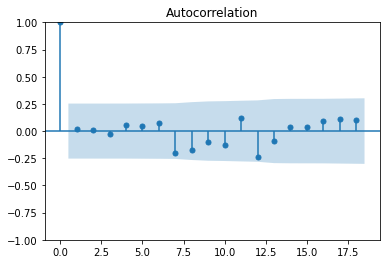

In [8]:
sm.graphics.tsa.plot_acf(ar_data[1])

In [9]:
x = np.arange(0, nsample)
test_data = [linear_coef * x + _ar_data for _ar_data in ar_data]

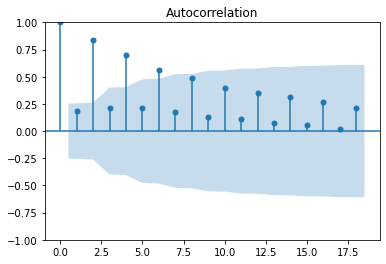

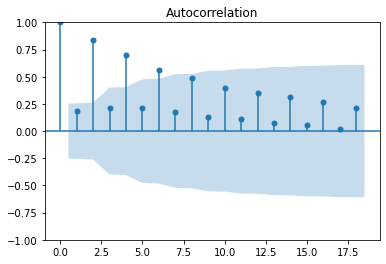

In [12]:
sm.graphics.tsa.plot_acf(test_data[2])

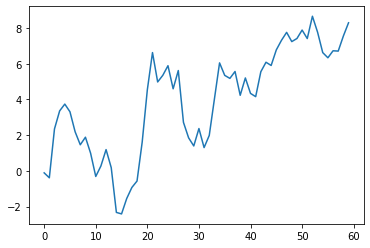

In [16]:
plt.plot(test_data[0])

In [17]:
test_dfs = [pd.DataFrame(_test_data, columns=["test"]) for _test_data in test_data]

In [27]:
for ar_coef, test_df in zip(ar_coefs, test_dfs):
    test_df.to_csv(f'data/test_ar1_{ar_coef[1]}.csv')